# This notebook generates Figure 2, which shows I-V curves measured before during and after irradiation and the corresponding reading on temperature sensor sensor CX-T

In [4]:
%pylab notebook
import os, sys, warnings
warnings.filterwarnings("ignore")

outputDirectory = '../figures/raw/'
parentDirectory = '../data/Ic/f23/'
sys.path.append('lib/')

import pandas as pd, seaborn as sns, hts_fitting as hts, default_figure_style as dfs

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Figure description

The data is from tape sample ffj20 at 20 K during a reference exposure (1200 keV x 30 nA). The LHS of the figure shows three I-V curves, measured before, after and during irradiation. The fourth curve (blue squares) is taken after irradiation at a temperature where the I-V matches the I-V measured during irradiation. This experiment is intended to provide evidence that the temperature sensor, albeit well coupled and close to the beam spot) does not accurately reflect the temperature of the material in the irradiated area.

<IPython.core.display.Javascript object>


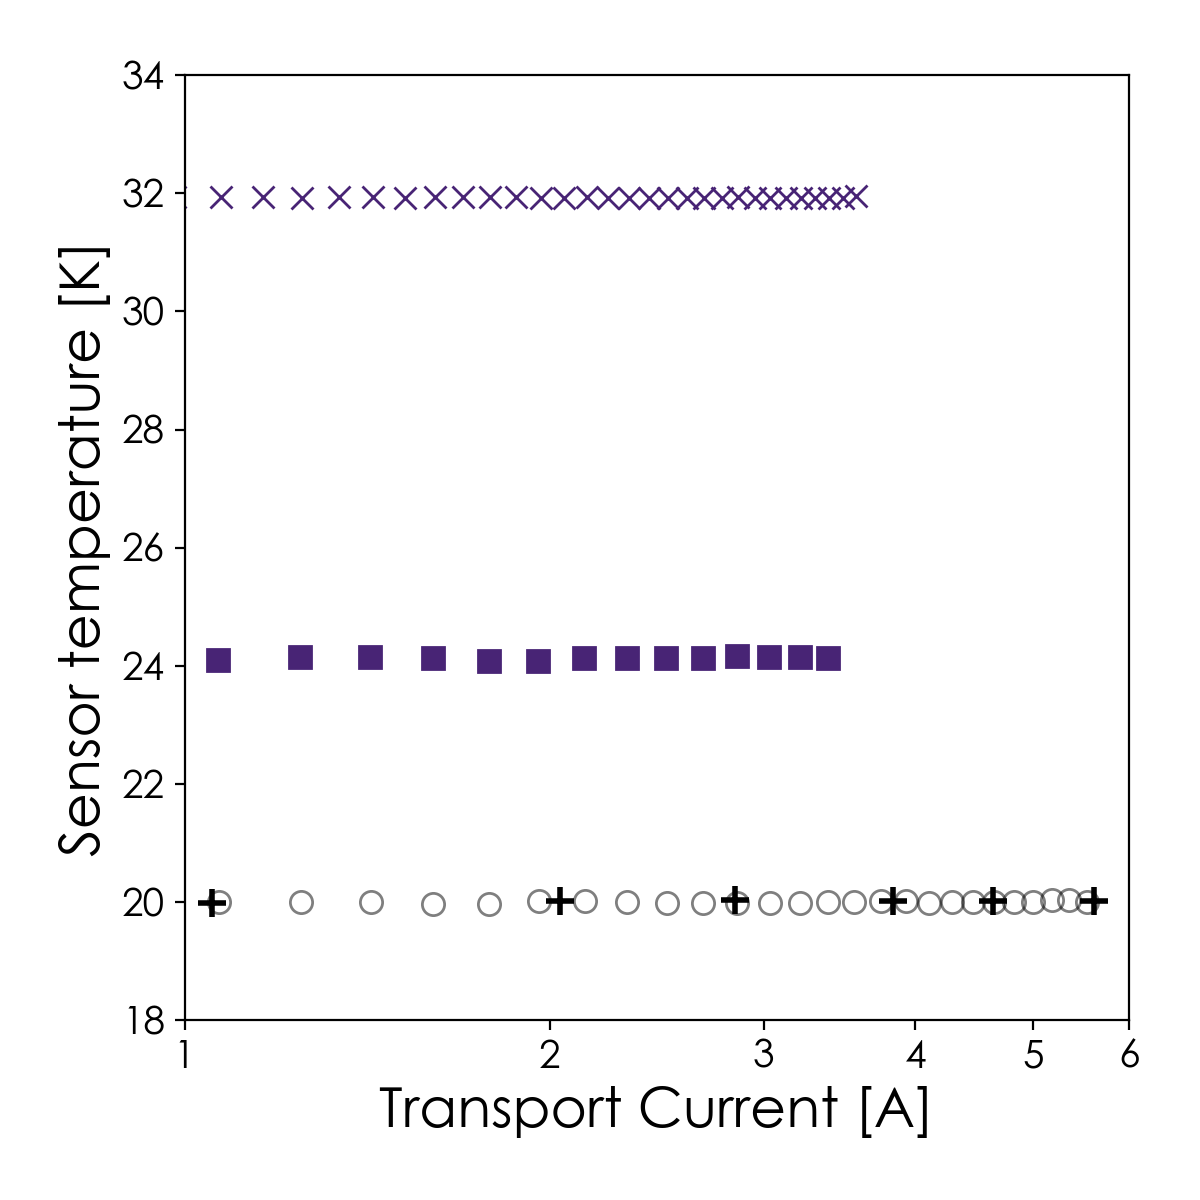

<IPython.core.display.Javascript object>


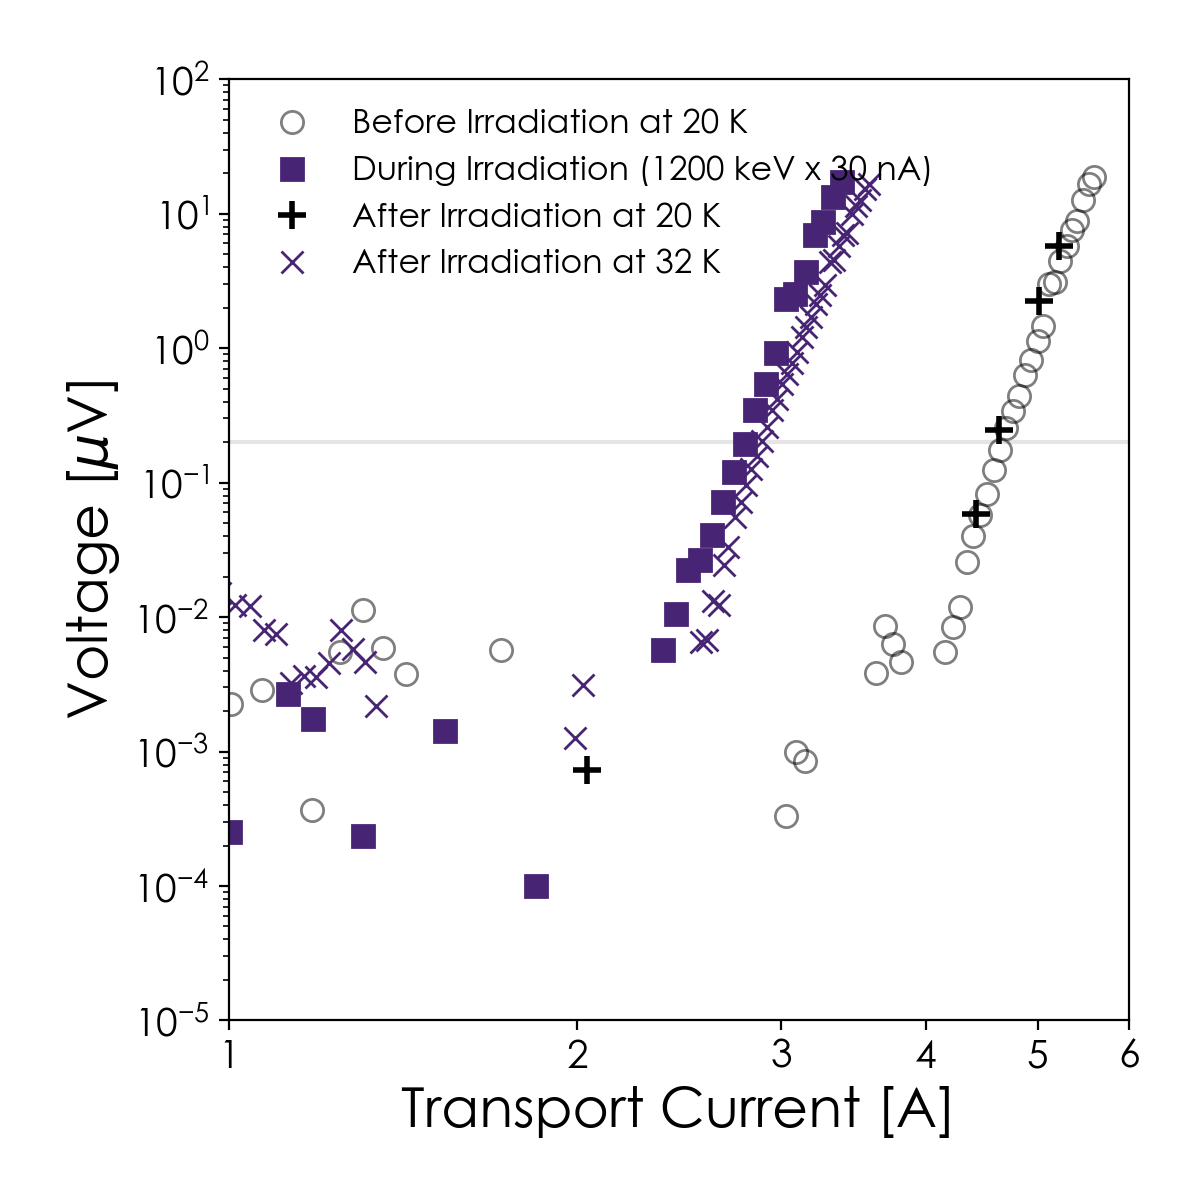

Temperature Before Irradiation at 20 K = 20.00 +/- 0.01
Temperature During Irradiation (1200 keV x 30 nA) = 24.12 +/- 0.02
Temperature After Irradiation at 20 K = 20.00 +/- 0.03
Temperature After Irradiation at 32 K = 31.92 +/- 0.01


In [20]:
palette = sns.color_palette('viridis', 9)

files = [
    'Ic_2023-10-31_23-06-11441040_f23-BeamOn3-20K-a.txt',
    'Ic_2023-10-31_23-12-11310373_f23-BeamOn3-20K-b.txt',
    'Ic_2023-11-01_10-29-29487750_f23-afterIrradiation-20K.txt',
    'Ic_2023-10-31_23-28-08056169_f23-afterIrradiation-32K.txt'
]

params = [
    {'label': 'Before Irradiation at 20 K',            'mfc': 'None',        'mec': 'k',         'marker': 'o', 'markersize': 8,  'alpha': .5, 'markeredgewidth': 1},
    {'label': 'During Irradiation (1200 keV x 30 nA)', 'mfc': palette[0],    'mec': palette[0],  'marker': 's', 'markersize': 8,  'alpha': 1,  'markeredgewidth': 1},
    {'label': 'After Irradiation at 20 K',             'mfc': 'k',           'mec': 'k',         'marker': '+', 'markersize': 10, 'alpha': 1,  'markeredgewidth': 2},
    {'label': 'After Irradiation at 32 K',             'mfc': 'None',        'mec': palette[0],  'marker': 'x', 'markersize': 8,  'alpha': 1,  'markeredgewidth': 1}
]

figT, axT = plt.subplots(1, 1, figsize=(6, 6))
figI, axI = plt.subplots(1, 1, figsize=(6, 6))

axI.axhline(0.2, linestyle='-', alpha=.1, color='k')

for f, p in zip(files, params):
    data = pd.read_csv(parentDirectory+f, skiprows=1, delim_whitespace=True)
    ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(parentDirectory+f, function='powerLaw')    
    axI.loglog(current, voltage*1e6, linestyle='None', **p)
    axT.semilogx(data.iHTS_A[::3], data.tHTS_K[::3], linestyle='None', **p)
    print('Temperature {} = {:4.2f} +/- {:4.2f}'.format(p['label'], data.tHTS_K[::3].mean(), data.tHTS_K[::3].std()))

axI.legend(loc='upper left', frameon=False)#, bbox_to_anchor=(1.05, 1.02))
axI.set_xlim(1, 6)
axT.set_xlim(1, 6)
axI.set_ylim(1e-5, 1e2)
axT.set_ylim(18, 34)
xticks = [1, 2, 3, 4, 5, 6]
axI.set_xticks(xticks)
axT.set_xticks(xticks)
axI.set_xticklabels([str(tick) for tick in xticks])
axT.set_xticklabels([str(tick) for tick in xticks])
axT.set_yticks([18, 20, 22, 24, 26, 28, 30, 32, 34])
axI.set_ylabel('Voltage [$\mu$V]')
axT.set_ylabel('Sensor temperature [K]') 
axI.set_xlabel('Transport Current [A]')
axT.set_xlabel('Transport Current [A]')
figI.tight_layout()
figT.tight_layout()

figT.savefig(outputDirectory+'figure02-ivcurves-a.svg', format='svg', transparent=True)
figI.savefig(outputDirectory+'figure02-ivcurves-b.svg', format='svg', transparent=True)

